In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import joblib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.inspection import DecisionBoundaryDisplay

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
import imblearn
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize

In [104]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [105]:
# from google.colab import drive
# drive.mount('/content/drive')


In [106]:
data = pd.read_csv("/Users/robintran/Desktop/TL/Python_Guskey_Analysis/analysis/student_work_modeling/final_df.csv")

In [107]:
## Specific columns
data_prep = data[['site_x', 'coach_end_feed_1',
                  'coach_end_feed_4',
                  'coach_end_feed_15',
                  'coach_end_feed_16',
                  'coach_end_feed_10',
                  'coach_ongoing_feed_1',
                  'coach_ongoing_feed_2',
                  'coach_ongoing_feed_3',
                  'coach_ongoing_feed_4',
                  'coach_ongoing_feed_5',
                  'fac_feedback_1',
                  'fac_feedback_2',
                  'fac_feedback_3',
                  'fac_feedback_4',
                  'fac_feedback_5',
                  'nps_all',
                  'gender',
                  'race_1',
                  'race_2',
                  'race_3',
                  'race_4',
                  'race_5',
                  'race_6',
                  'race_7',
                  'ipg_form_score',
                  'content_area',
                  'Mode Grade']]

In [108]:
data_prep

,site_x,coach_end_feed_1,coach_end_feed_4,coach_end_feed_15,coach_end_feed_16,coach_end_feed_10,coach_ongoing_feed_1,coach_ongoing_feed_2,coach_ongoing_feed_3,coach_ongoing_feed_4,coach_ongoing_feed_5,fac_feedback_1,fac_feedback_2,fac_feedback_3,fac_feedback_4,fac_feedback_5,nps_all,gender,race_1,race_2,race_3,race_4,race_5,race_6,race_7,ipg_form_score,content_area,Mode Grade
0,MA_DESE,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,Detractor,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Math,2.0
1,MA_DESE,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,Detractor,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Math,2.0
2,MA_DESE,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,Promoter,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Math,2.0
3,MA_DESE,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,Promoter,Female,NaN,Black or African American,NaN,NaN,NaN,NaN,NaN,NaN,Math,2.0
4,AR_Osceola School District,4 - Agree,4 - Agree,4 - Agree,4 - Agree,4 - Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Detractor,Female,NaN,Black or African American,NaN,NaN,NaN,NaN,NaN,10.000000,K-2 Early Literacy (Foundational Skills),1.0
5,MA_DESE,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,Promoter,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,NY_D75,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,Passive,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.769231,ELA,1.0
7,MA_DESE,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,Passive,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Math,0.0
8,MA_DESE,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,Promoter,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Math,2.0
9,AR_Osceola School District,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,Passive,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [109]:
data_prep['site'] = data_prep['site_x']

In [110]:
data_prep['content_area'] = data_prep['content_area'].fillna(data_prep['content_area'].mode())

In [111]:
# Classify race
def classify_race(row):

    races = ['race_1', 'race_2', 'race_3', 'race_4', 'race_5', 'race_6', 'race_7']

    if sum(pd.notna(row[r]) for r in races) > 1:
        return 'More than one race'

    if row['race_1'] == 'Asian':
        return 'Asian'
    if row['race_2'] == 'Black or African American':
        return 'Black or African American'
    if row['race_3'] == 'Native American or Indian':
        return 'Native American or Indian'
    if  row['race_5'] == 'White':
        return 'White'
    if  row['race_6'] == 'Prefer not to say':
        return 'Prefer not to say'
    if  row['race_7'] == 'I prefer to self describe':
        return 'I prefer to self describe'

    return 'Unknown'

data_prep['race'] = data_prep.apply(classify_race, axis=1)

In [112]:
data_prep

,site_x,coach_end_feed_1,coach_end_feed_4,coach_end_feed_15,coach_end_feed_16,coach_end_feed_10,coach_ongoing_feed_1,coach_ongoing_feed_2,coach_ongoing_feed_3,coach_ongoing_feed_4,coach_ongoing_feed_5,fac_feedback_1,fac_feedback_2,fac_feedback_3,fac_feedback_4,fac_feedback_5,nps_all,gender,race_1,race_2,race_3,race_4,race_5,race_6,race_7,ipg_form_score,content_area,Mode Grade,site,race
0,MA_DESE,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,Detractor,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Math,2.0,MA_DESE,Unknown
1,MA_DESE,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,Detractor,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Math,2.0,MA_DESE,Unknown
2,MA_DESE,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,Promoter,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Math,2.0,MA_DESE,Unknown
3,MA_DESE,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,Promoter,Female,NaN,Black or African American,NaN,NaN,NaN,NaN,NaN,NaN,Math,2.0,MA_DESE,Black or African American
4,AR_Osceola School District,4 - Agree,4 - Agree,4 - Agree,4 - Agree,4 - Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Detractor,Female,NaN,Black or African American,NaN,NaN,NaN,NaN,NaN,10.000000,K-2 Early Literacy (Foundational Skills),1.0,AR_Osceola School District,Black or African American
5,MA_DESE,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,Promoter,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,MA_DESE,Unknown
6,NY_D75,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,Passive,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.769231,ELA,1.0,NY_D75,Unknown
7,MA_DESE,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,Passive,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Math,0.0,MA_DESE,Unknown
8,MA_DESE,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,Promoter,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Math,2.0,MA_DESE,Unknown
9,AR_Osceola School District,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,Passive,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,AR_Osceola School District,Unknown


In [113]:
data_drop_race = data_prep.drop(columns = ['race_1',
                  'race_2',
                  'race_3',
                  'race_4',
                  'race_5',
                  'race_6',
                  'race_7'])
data_drop_race

,site_x,coach_end_feed_1,coach_end_feed_4,coach_end_feed_15,coach_end_feed_16,coach_end_feed_10,coach_ongoing_feed_1,coach_ongoing_feed_2,coach_ongoing_feed_3,coach_ongoing_feed_4,coach_ongoing_feed_5,fac_feedback_1,fac_feedback_2,fac_feedback_3,fac_feedback_4,fac_feedback_5,nps_all,gender,ipg_form_score,content_area,Mode Grade,site,race
0,MA_DESE,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,Detractor,Female,NaN,Math,2.0,MA_DESE,Unknown
1,MA_DESE,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,Detractor,Female,NaN,Math,2.0,MA_DESE,Unknown
2,MA_DESE,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,Promoter,Female,NaN,Math,2.0,MA_DESE,Unknown
3,MA_DESE,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,Promoter,Female,NaN,Math,2.0,MA_DESE,Black or African American
4,AR_Osceola School District,4 - Agree,4 - Agree,4 - Agree,4 - Agree,4 - Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Detractor,Female,10.000000,K-2 Early Literacy (Foundational Skills),1.0,AR_Osceola School District,Black or African American
5,MA_DESE,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,Promoter,Female,NaN,NaN,0.0,MA_DESE,Unknown
6,NY_D75,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,Passive,Female,5.769231,ELA,1.0,NY_D75,Unknown
7,MA_DESE,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,Passive,Female,NaN,Math,0.0,MA_DESE,Unknown
8,MA_DESE,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,Promoter,Female,NaN,Math,2.0,MA_DESE,Unknown
9,AR_Osceola School District,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,Passive,Female,NaN,NaN,2.0,AR_Osceola School District,Unknown


In [114]:
## Get state
data_drop_race['site_state']=data_drop_race['site'].str[:2]
data_drop_race_drop_site = data_drop_race.drop(columns='site')

In [115]:
## Get score for coach_end_feed column
data_drop_race_drop_site['coach_end_feed_1'] = data_drop_race_drop_site['coach_end_feed_1'].str.extract('(\d+)')
data_drop_race_drop_site['coach_end_feed_4'] = data_drop_race_drop_site['coach_end_feed_4'].str.extract('(\d+)')
data_drop_race_drop_site['coach_end_feed_15'] = data_drop_race_drop_site['coach_end_feed_15'].str.extract('(\d+)')
data_drop_race_drop_site['coach_end_feed_16'] = data_drop_race_drop_site['coach_end_feed_16'].str.extract('(\d+)')
data_drop_race_drop_site['coach_end_feed_10'] = data_drop_race_drop_site['coach_end_feed_10'].str.extract('(\d+)')

In [116]:
## Get score for fac_feedback column

data_drop_race_drop_site['fac_feedback_1'] = data_drop_race_drop_site['fac_feedback_1'].astype(str).str.extract('(\d+)')
data_drop_race_drop_site['fac_feedback_2'] = data_drop_race_drop_site['fac_feedback_2'].astype(str).str.extract('(\d+)')
data_drop_race_drop_site['fac_feedback_3'] = data_drop_race_drop_site['fac_feedback_3'].astype(str).str.extract('(\d+)')
data_drop_race_drop_site['fac_feedback_4'] = data_drop_race_drop_site['fac_feedback_4'].astype(str).str.extract('(\d+)')
data_drop_race_drop_site['fac_feedback_5'] = data_drop_race_drop_site['fac_feedback_5'].astype(str).str.extract('(\d+)')

In [117]:
## Coalesce coach_end_feed and coach_ongoing_feed_2 -> rename to coach_end_feed

data_drop_race_drop_site['coach_end_feed_1'] = data_drop_race_drop_site['coach_end_feed_1'].combine_first(data_drop_race_drop_site['coach_ongoing_feed_2'])
data_drop_race_drop_site['coach_end_feed_4'] = data_drop_race_drop_site['coach_end_feed_4'].combine_first(data_drop_race_drop_site['coach_ongoing_feed_2'])
data_drop_race_drop_site['coach_end_feed_15'] = data_drop_race_drop_site['coach_end_feed_15'].combine_first(data_drop_race_drop_site['coach_ongoing_feed_3'])
data_drop_race_drop_site['coach_end_feed_16'] = data_drop_race_drop_site['coach_end_feed_16'].combine_first(data_drop_race_drop_site['coach_ongoing_feed_4'])
data_drop_race_drop_site['coach_end_feed_10'] = data_drop_race_drop_site['coach_end_feed_10'].combine_first(data_drop_race_drop_site['coach_ongoing_feed_5'])

In [118]:
## Coalesce coach_end_feed and fac_feedback -> rename to coach_end_feed


data_drop_race_drop_site['coach_end_feed_1'] = data_drop_race_drop_site['coach_end_feed_1'].combine_first(data_drop_race_drop_site['fac_feedback_1'])
data_drop_race_drop_site['coach_end_feed_4'] = data_drop_race_drop_site['coach_end_feed_4'].combine_first(data_drop_race_drop_site['fac_feedback_2'])
data_drop_race_drop_site['coach_end_feed_15'] = data_drop_race_drop_site['coach_end_feed_15'].combine_first(data_drop_race_drop_site['fac_feedback_3'])
data_drop_race_drop_site['coach_end_feed_16'] = data_drop_race_drop_site['coach_end_feed_16'].combine_first(data_drop_race_drop_site['fac_feedback_4'])
data_drop_race_drop_site['coach_end_feed_10'] = data_drop_race_drop_site['coach_end_feed_10'].combine_first(data_drop_race_drop_site['fac_feedback_5'])


In [119]:
data_drop_race_drop_site["ipg_form_score"].fillna(data_drop_race_drop_site["ipg_form_score"].mean(), inplace=True)

In [120]:
## Drop unnecessary columns

data_drop_race_drop_site_drop_rate = data_drop_race_drop_site.drop(columns = [
                  'coach_ongoing_feed_1',
                  'coach_ongoing_feed_2',
                  'coach_ongoing_feed_3',
                  'coach_ongoing_feed_4',
                  'coach_ongoing_feed_5',
                  'fac_feedback_1',
                  'fac_feedback_2',
                  'fac_feedback_3',
                  'fac_feedback_4',
                  'fac_feedback_5'
]
                                                                   )

In [121]:
# draft = data_drop_race_drop_site_drop_rate[data_drop_race_drop_site_drop_rate['nps_all'].isna()][['coach_end_feed_1', 'coach_end_feed_4',
#                                                                                           'coach_end_feed_15', 'coach_end_feed_16',
#                                                                                           'coach_end_feed_10', 'nps_all']]

In [122]:
## Convert numeric type to specified columns (coach_end_feed)

columns = [
    'coach_end_feed_1',
    'coach_end_feed_4',
    'coach_end_feed_15',
    'coach_end_feed_16',
    'coach_end_feed_10'
]
for col in columns:
  data_drop_race_drop_site_drop_rate[col]=pd.to_numeric(data_drop_race_drop_site_drop_rate[col], errors='coerce')

data_drop_race_drop_site_drop_rate.dtypes

site_x                object
coach_end_feed_1     float64
coach_end_feed_4     float64
coach_end_feed_15    float64
coach_end_feed_16    float64
coach_end_feed_10    float64
nps_all               object
gender                object
ipg_form_score       float64
content_area          object
Mode Grade           float64
race                  object
site_state            object
dtype: object

In [123]:
## Nps_category to check if any score in coach_end_feed <= 3 -> return detractor, else promoter

def nps_category(row):
    # Columns to check
    check_columns = ['coach_end_feed_1', 'coach_end_feed_4', 'coach_end_feed_15', 'coach_end_feed_16', 'coach_end_feed_10']
    # If any column in the defined list has a value of 3, set as 'Detractor'
    if (3 in row[check_columns].values) | (2 in row[check_columns].values) | (1 in row[check_columns].values):
        return 'Detractor'
    # Otherwise, set as 'Promoter'
    else:
        return 'Promoter'

In [124]:
# draft

In [125]:
## Coalesce null with mode for coach_end_feed

data_drop_race_drop_site_drop_rate['coach_end_feed_1'] = data_drop_race_drop_site_drop_rate['coach_end_feed_1'].fillna( data_drop_race_drop_site_drop_rate['coach_end_feed_1'].mode()[0])
data_drop_race_drop_site_drop_rate['coach_end_feed_4'] = data_drop_race_drop_site_drop_rate['coach_end_feed_4'].fillna( data_drop_race_drop_site_drop_rate['coach_end_feed_4'].mode()[0])
data_drop_race_drop_site_drop_rate['coach_end_feed_15'] = data_drop_race_drop_site_drop_rate['coach_end_feed_15'].fillna( data_drop_race_drop_site_drop_rate['coach_end_feed_15'].mode()[0])
data_drop_race_drop_site_drop_rate['coach_end_feed_16'] = data_drop_race_drop_site_drop_rate['coach_end_feed_16'].fillna( data_drop_race_drop_site_drop_rate['coach_end_feed_16'].mode()[0])
data_drop_race_drop_site_drop_rate['coach_end_feed_10'] = data_drop_race_drop_site_drop_rate['coach_end_feed_10'].fillna( data_drop_race_drop_site_drop_rate['coach_end_feed_10'].mode()[0])

In [126]:
## Now coalsece nps_all column to value returned from function above (get na row from nps_all col and coalesce)

mask = data_drop_race_drop_site_drop_rate['nps_all'].isna()
data_drop_race_drop_site_drop_rate.loc[mask, 'nps_all'] = data_drop_race_drop_site_drop_rate[mask].apply(nps_category, axis=1)


In [127]:
mode_value = data_drop_race_drop_site_drop_rate['content_area'].mode()[0]

# Fill NaN values with the mode value
data_drop_race_drop_site_drop_rate['content_area'] = data_drop_race_drop_site_drop_rate['content_area'].fillna(mode_value)
data_drop_race_drop_site_drop_rate

,site_x,coach_end_feed_1,coach_end_feed_4,coach_end_feed_15,coach_end_feed_16,coach_end_feed_10,nps_all,gender,ipg_form_score,content_area,Mode Grade,race,site_state
0,MA_DESE,4.0,4.0,4.0,4.0,4.0,Detractor,Female,29.648835,Math,2.0,Unknown,MA
1,MA_DESE,4.0,4.0,4.0,4.0,4.0,Detractor,Female,29.648835,Math,2.0,Unknown,MA
2,MA_DESE,5.0,5.0,5.0,5.0,5.0,Promoter,Female,29.648835,Math,2.0,Unknown,MA
3,MA_DESE,5.0,5.0,5.0,5.0,5.0,Promoter,Female,29.648835,Math,2.0,Black or African American,MA
4,AR_Osceola School District,4.0,4.0,4.0,4.0,4.0,Detractor,Female,10.000000,K-2 Early Literacy (Foundational Skills),1.0,Black or African American,AR
5,MA_DESE,5.0,5.0,5.0,5.0,5.0,Promoter,Female,29.648835,Math,0.0,Unknown,MA
6,NY_D75,4.0,4.0,4.0,4.0,4.0,Passive,Female,5.769231,ELA,1.0,Unknown,NY
7,MA_DESE,5.0,5.0,5.0,5.0,5.0,Passive,Female,29.648835,Math,0.0,Unknown,MA
8,MA_DESE,5.0,5.0,5.0,5.0,4.0,Promoter,Female,29.648835,Math,2.0,Unknown,MA
9,AR_Osceola School District,5.0,5.0,5.0,5.0,5.0,Passive,Female,29.648835,Math,2.0,Unknown,AR


In [128]:
## Coalesce null with mode for gender

data_drop_race_drop_site_drop_rate['gender'] = data_drop_race_drop_site_drop_rate['gender'].fillna( data_drop_race_drop_site_drop_rate['gender'].mode()[0])

In [129]:
data_drop_race_drop_site_drop_rate

,site_x,coach_end_feed_1,coach_end_feed_4,coach_end_feed_15,coach_end_feed_16,coach_end_feed_10,nps_all,gender,ipg_form_score,content_area,Mode Grade,race,site_state
0,MA_DESE,4.0,4.0,4.0,4.0,4.0,Detractor,Female,29.648835,Math,2.0,Unknown,MA
1,MA_DESE,4.0,4.0,4.0,4.0,4.0,Detractor,Female,29.648835,Math,2.0,Unknown,MA
2,MA_DESE,5.0,5.0,5.0,5.0,5.0,Promoter,Female,29.648835,Math,2.0,Unknown,MA
3,MA_DESE,5.0,5.0,5.0,5.0,5.0,Promoter,Female,29.648835,Math,2.0,Black or African American,MA
4,AR_Osceola School District,4.0,4.0,4.0,4.0,4.0,Detractor,Female,10.000000,K-2 Early Literacy (Foundational Skills),1.0,Black or African American,AR
5,MA_DESE,5.0,5.0,5.0,5.0,5.0,Promoter,Female,29.648835,Math,0.0,Unknown,MA
6,NY_D75,4.0,4.0,4.0,4.0,4.0,Passive,Female,5.769231,ELA,1.0,Unknown,NY
7,MA_DESE,5.0,5.0,5.0,5.0,5.0,Passive,Female,29.648835,Math,0.0,Unknown,MA
8,MA_DESE,5.0,5.0,5.0,5.0,4.0,Promoter,Female,29.648835,Math,2.0,Unknown,MA
9,AR_Osceola School District,5.0,5.0,5.0,5.0,5.0,Passive,Female,29.648835,Math,2.0,Unknown,AR


In [130]:
data_drop_race_drop_site_drop_rate["Mode Grade"] = data_drop_race_drop_site_drop_rate["Mode Grade"].astype(float)

data_drop_race_drop_site_drop_rate["Mode Grade"] = data_drop_race_drop_site_drop_rate["Mode Grade"].replace(1.0, 0.0)
print(data_drop_race_drop_site_drop_rate["Mode Grade"].value_counts())


Mode Grade
0.0    53
2.0    35
Name: count, dtype: int64


In [131]:
data_drop_race_drop_site_drop_rate.dtypes
data_drop_race_drop_site_drop_rate.to_csv("/Users/robintran/Desktop/TL/Python_Guskey_Analysis/analysis/student_work_modeling/student_work_prediction.csv")

Model training

In [132]:
X = data_drop_race_drop_site_drop_rate[['coach_end_feed_1',
                                        'coach_end_feed_4',
                                        'coach_end_feed_15',
                                        'coach_end_feed_16',
                                        'coach_end_feed_10',
                                        'nps_all',
                                        'race',
                                        'gender',
                                        'site_state',
                                        'ipg_form_score',
                                        'content_area']]

y = data_drop_race_drop_site_drop_rate['Mode Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [133]:
y_train.value_counts()

Mode Grade
0.0    35
2.0    26
Name: count, dtype: int64

In [134]:
categorical_columns = ['nps_all', 'race', 'site_state', 'gender', 'content_area']
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))


# Drop original columns
X_train = X_train.drop(columns=categorical_columns).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_columns).reset_index(drop=True)

X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)


In [135]:
joblib.dump(encoder, '/Users/robintran/Desktop/TL/Python_Guskey_Analysis/analysis/student_work_modeling/encoder.pkl')
joblib.dump(list(X_train.columns), '/Users/robintran/Desktop/TL/Python_Guskey_Analysis/analysis/student_work_modeling/feature_names.pkl')

['/Users/robintran/Desktop/TL/Python_Guskey_Analysis/analysis/student_work_modeling/feature_names.pkl']

In [136]:
counter = Counter(y_train)
print(counter)

Counter({0.0: 35, 2.0: 26})


In [137]:
smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_sm)
print('after', counter)

after Counter({2.0: 35, 0.0: 35})


Random Forest

In [138]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1)

grid_search_rf.fit(X_train, y_train)

print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_rf.best_score_))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 0.59


In [139]:
y_pred = grid_search_rf.predict(X_test)

In [140]:
# Print performance metrics
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred))

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72        18
         2.0       0.44      0.44      0.44         9

    accuracy                           0.63        27
   macro avg       0.58      0.58      0.58        27
weighted avg       0.63      0.63      0.63        27



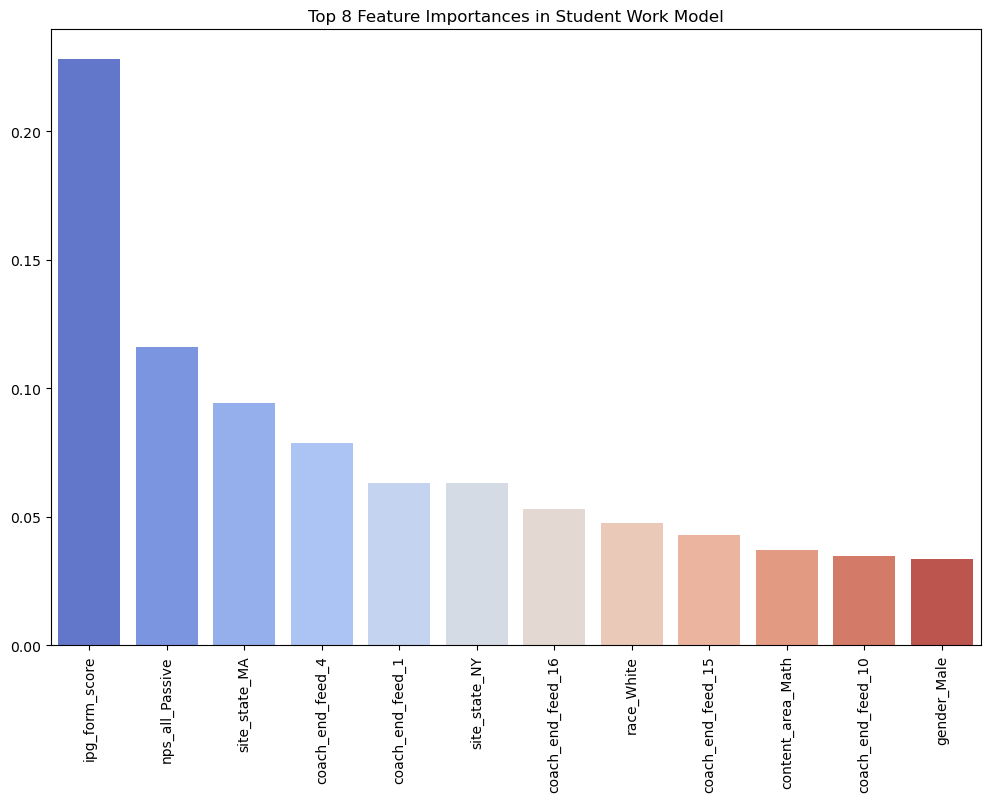

In [147]:
# Get feature importances
importances = best_rf.feature_importances_

# Sort the feature importances in descending order and create labels
indices = np.argsort(importances)[::-1]
top_indices = indices[:12]  # Get the top 8 indices

# Get the labels and importances for the top 8 features
top_labels = X_train.columns[top_indices]
top_importances = importances[top_indices]

palette = sns.color_palette("coolwarm", len(top_importances))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title('Top Feature Importances in Student Work Model')

# Use seaborn to create a barplot with the heatmap color palette
sns.barplot(x=top_labels, y=top_importances, palette=palette)

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [142]:
joblib.dump(best_rf, '/Users/robintran/Desktop/TL/Python_Guskey_Analysis/analysis/student_work_modeling/rf_weights_guskey.pkl')

['/Users/robintran/Desktop/TL/Python_Guskey_Analysis/analysis/student_work_modeling/rf_weights_guskey.pkl']

In [143]:
best_rf_features = best_rf.feature_names_in_
joblib.dump(best_rf_features, '/Users/robintran/Desktop/TL/Python_Guskey_Analysis/analysis/student_work_modeling/feature_names.pkl')

['/Users/robintran/Desktop/TL/Python_Guskey_Analysis/analysis/student_work_modeling/feature_names.pkl']

In [66]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [43]:
lgbm_model = lgb.LGBMClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7],
    'num_leaves': [31, 50],
    'subsample': [0.7, 1.0]
}

grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=1)

grid_search.fit(X_train, y_train_encoded)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 20, number of negative: 28
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 48, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.416667 -> initscore=-0.336472
[LightGBM] [Info] Start training from score -0.336472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [44]:
y_pred = grid_search.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [45]:
print("Classification Report for LightGBM:")
print(classification_report(y_test_encoded, y_pred))

Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.65      0.61      0.63        18
           1       0.30      0.33      0.32         9

    accuracy                           0.52        27
   macro avg       0.47      0.47      0.47        27
weighted avg       0.53      0.52      0.52        27



In [46]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=1)

grid_search_knn.fit(X_train, y_train)

print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best cross-validation score: 0.64


In [47]:
y_pred = grid_search_knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69        18
         2.0       0.40      0.44      0.42         9

    accuracy                           0.59        27
   macro avg       0.55      0.56      0.55        27
weighted avg       0.60      0.59      0.60        27



In [48]:
logit = LogisticRegression(penalty='l2', solver='saga', multi_class='multinomial', random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', logit)
])

param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', refit=True)

grid_search.fit(X_train_sm, y_train_sm)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'logistic__C': 0.01}
Best cross-validation score: 0.58


In [49]:
y_pred = grid_search.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.33      0.41        18
         2.0       0.25      0.44      0.32         9

    accuracy                           0.37        27
   macro avg       0.40      0.39      0.37        27
weighted avg       0.45      0.37      0.38        27



In [51]:
xgb_model = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5],
    'colsample_bytree': [0.3, 0.5],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=1)

grid_search.fit(X_train, y_train_encoded)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.3,

In [52]:
y_pred = grid_search.predict(X_test)

In [53]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1])

In [54]:
y_pred_str = [f"{label}.0" for label in y_pred]  # Convert predicted labels to string
print(classification_report(y_test.astype(str), y_pred_str))

              precision    recall  f1-score   support

         0.0       0.75      0.83      0.79        18
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         9

    accuracy                           0.56        27
   macro avg       0.25      0.28      0.26        27
weighted avg       0.50      0.56      0.53        27



In [55]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1])

In [56]:
y_test

76    2.0
0     2.0
26    0.0
22    2.0
12    0.0
67    0.0
10    2.0
18    0.0
4     0.0
68    0.0
85    0.0
65    0.0
53    2.0
80    0.0
84    0.0
64    2.0
33    0.0
79    0.0
55    0.0
73    0.0
11    2.0
30    2.0
40    0.0
28    0.0
9     2.0
66    0.0
5     0.0
Name: Mode Grade, dtype: float64